#Project 2

###Let's start
I downloaded the dataset to begin the analysis process. Then, I imported the necessary Python libraries to enable data manipulation and visualization.

In [1]:
import kagglehub
path = kagglehub.dataset_download("raneemrefaie/pre-interview-acceptance")

print("Path to dataset files:", path)
import os
import pandas as pd
dataset_files = os.listdir(path)
print("Files in the dataset directory:", dataset_files)

csv_file = [file for file in dataset_files if file.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

df

100%|██████████| 13.3k/13.3k [00:00<00:00, 3.63MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/raneemrefaie/pre-interview-acceptance/versions/1


Files in the dataset directory: ['logatta.csv']


,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False
...,...,...,...,...,...,...,...,...,...
1487,35,Travel_Rarely,3,Married,Yes,1856,682,Male,False
1488,35,Travel_Rarely,4,Divorced,No,1857,1103,Male,False
1489,31,Travel_Rarely,3,Single,Yes,1858,976,Male,False
1490,37,Travel_Rarely,4,Single,No,1859,1351,Female,False


###Preprocess the data
"I have performed data preprocessing, including the use of a OneHotEncoder for categorical variables. Additionally, I removed the EmployeeNumber column, as it could negatively impact the accuracy of the model."

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_dataframe(df):
    label_encoder = LabelEncoder()
    df_encoded = df.copy()
    categorical_columns = df_encoded.select_dtypes(include=['object', 'category','bool']).columns
    for col in categorical_columns:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    return df_encoded

encoded_df = encode_dataframe(df)
encoded_df.drop('EmployeeNumber', axis=1, inplace=False)

encoded_df

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,2,2,2,1,1,1102,0,1
1,49,1,1,1,0,2,279,1,0
2,37,2,2,2,1,4,1373,1,0
3,33,1,4,1,1,5,1392,0,0
4,27,2,1,1,0,7,591,1,0
...,...,...,...,...,...,...,...,...,...
1487,35,2,3,1,1,1856,682,1,0
1488,35,2,4,0,0,1857,1103,1,0
1489,31,2,3,2,1,1858,976,1,0
1490,37,2,4,2,0,1859,1351,0,0


###Vizualization
Here you can see
1. Age Distribution
2. Business Travel Count
3. Education Level Count
4. Martial Status Distribution
5. OverTime Distribution
6. Daily Rate Distribution
7. Gender Distribution

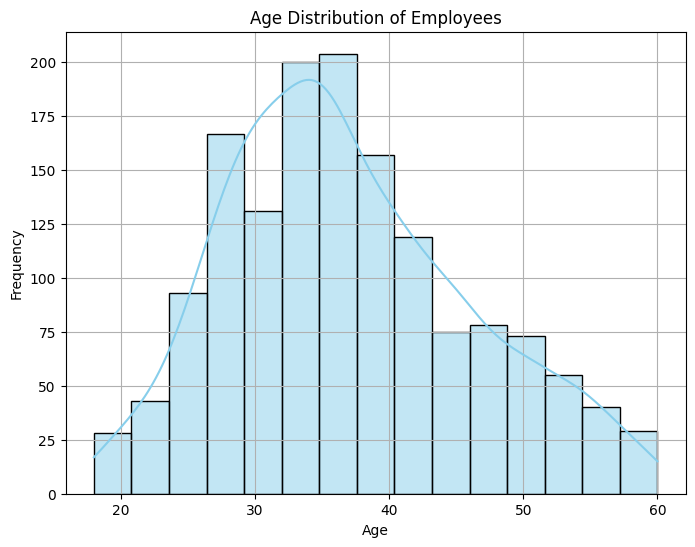

<ipython-input-32-6a277fe18d91>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BusinessTravel', palette='Set2')


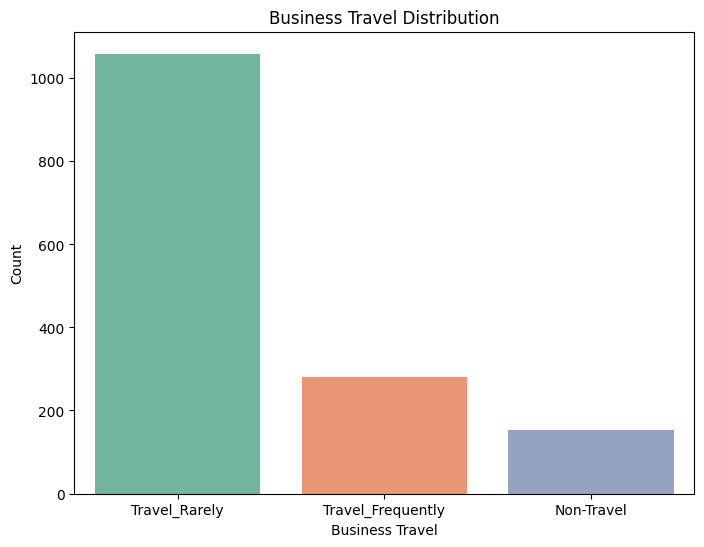

<ipython-input-32-6a277fe18d91>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='Set1')


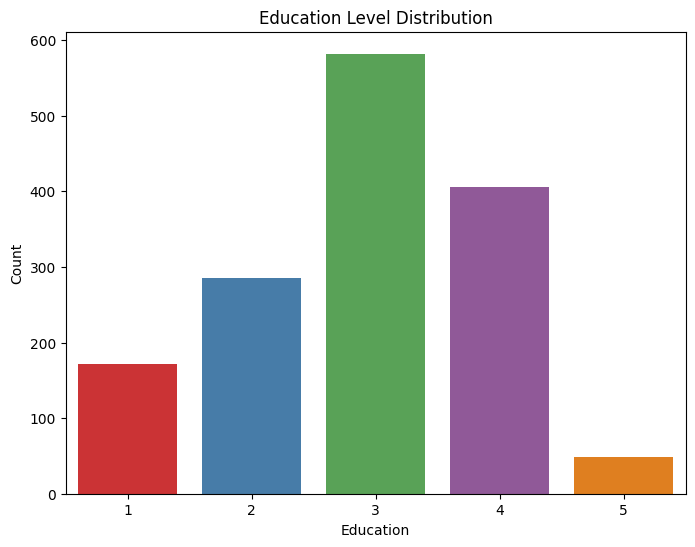

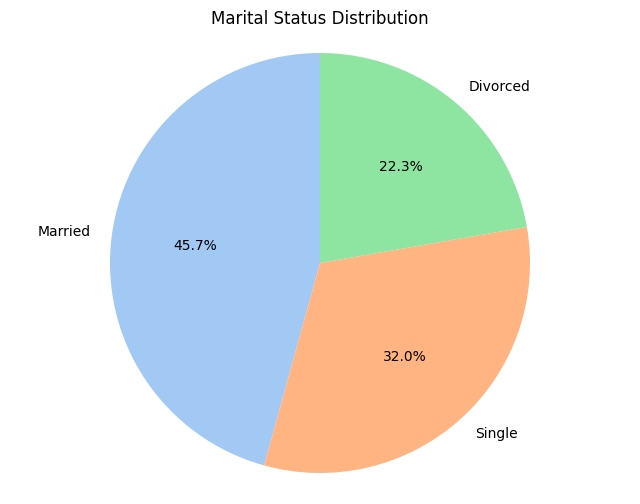

<ipython-input-32-6a277fe18d91>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='OverTime', palette='viridis')


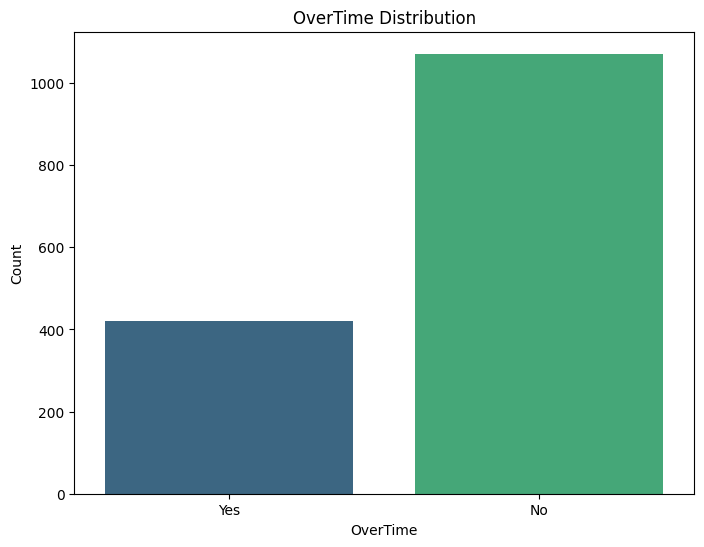

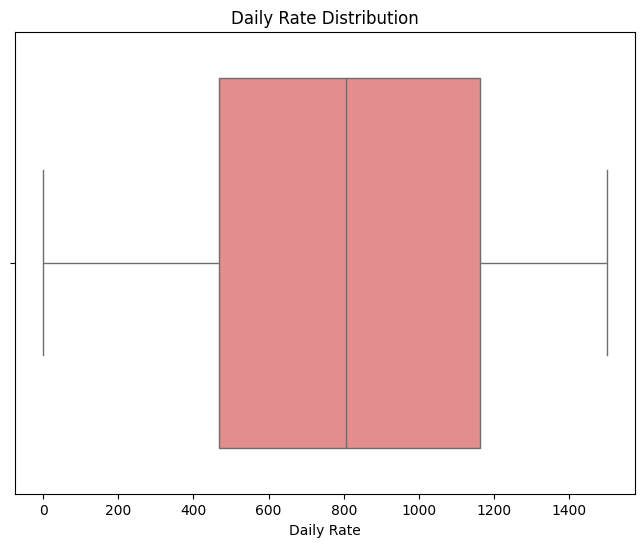

<ipython-input-32-6a277fe18d91>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


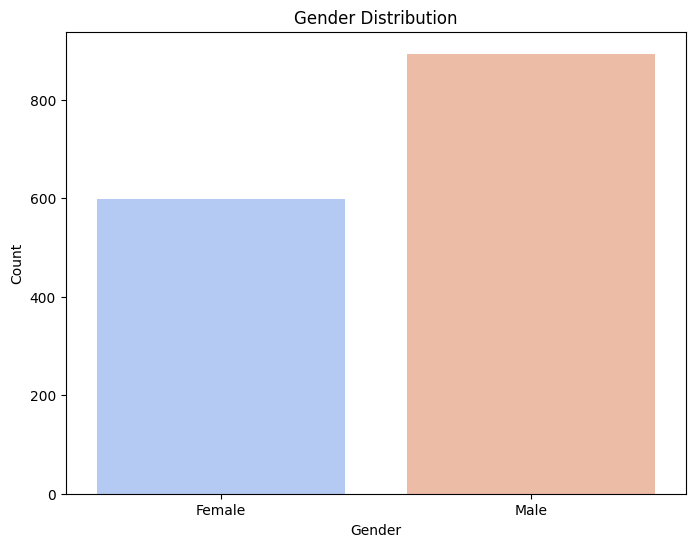

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', palette='Set2')
plt.title('Business Travel Distribution')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette='Set1')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
marital_status_counts = df['MaritalStatus'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OverTime', palette='viridis')
plt.title('OverTime Distribution')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DailyRate', color='lightcoral')
plt.title('Daily Rate Distribution')
plt.xlabel('Daily Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()




###Spliting data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = encoded_df.drop(columns=['accepted for the interview'])
y = encoded_df['accepted for the interview']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###For prediction have been used three classification methods (Regression, Naive Bayes and KNN)

#### Logistic

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression:
Accuracy: 0.9163879598662207
Confusion Matrix:
 [[261   7]
 [ 18  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       268
           1       0.65      0.42      0.51        31

    accuracy                           0.92       299
   macro avg       0.79      0.70      0.73       299
weighted avg       0.91      0.92      0.91       299



#### Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred_nb = naive_bayes.predict(X_test_scaled)


print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes:
Accuracy: 0.8695652173913043
Confusion Matrix:
 [[230  38]
 [  1  30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       268
           1       0.44      0.97      0.61        31

    accuracy                           0.87       299
   macro avg       0.72      0.91      0.76       299
weighted avg       0.94      0.87      0.89       299



#### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nK-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN):
Accuracy: 0.9565217391304348
Confusion Matrix:
 [[263   5]
 [  8  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       268
           1       0.82      0.74      0.78        31

    accuracy                           0.96       299
   macro avg       0.90      0.86      0.88       299
weighted avg       0.96      0.96      0.96       299



###Comperhension

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Naive Bayes Accuracy: {accuracy_naive_bayes}")
print(f"KNN Accuracy: {accuracy_knn}")


Logistic Regression Accuracy: 0.9163879598662207
Naive Bayes Accuracy: 0.8695652173913043
KNN Accuracy: 0.9565217391304348
